<a href="https://colab.research.google.com/github/AG-2478/LocalRepo/blob/feature1/BSEStockExchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [ ]:
!pip3 install quandl

In [ ]:
import quandl
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline


ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


quandl.ApiConfig.api_key = "5HURTXZfCqeNA7NuifE7"

###Stocks
BOM500325 - reliance

BOM539254 - adani transmission

BOM532461 - PNB; BOM532174 - ICICI; BOM500180 - HDFC; BOM500112 - SBI

BOM532540 - TCS; BOM500209 - Infosys; BOM507685 - Wipro

BOM541450 - Adani Green Energy

BOM500164 - Godrej; BOM500696 - Unilever

BOM570001 - Tata motors; BOM505200 - Eicher; BOM532756 - Mahindra







In [ ]:
stock = quandl.get("BSE/BOM532540")
stock = stock.reset_index()
stock

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2004-08-25,1076.00,1080.00,979.00,987.50,1004.163872,6536309.0,121534.0,6.563525e+09,1858962.0,28.44,101.00,-88.50
1,2004-08-26,992.70,996.70,975.30,978.55,985.243466,2243016.0,44222.0,2.209917e+09,497612.0,22.18,21.40,-14.15
2,2004-08-27,982.45,982.45,958.55,962.35,969.424008,1503317.0,31798.0,1.457352e+09,263508.0,17.53,23.90,-20.10
3,2004-08-30,967.70,989.75,965.00,986.25,982.607932,1124819.0,23698.0,1.105256e+09,220874.0,19.64,24.75,18.55
4,2004-08-31,989.00,990.00,976.00,987.95,982.258276,1135066.0,19871.0,1.114928e+09,282277.0,24.87,14.00,-1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,2022-06-17,3099.65,3110.55,3023.35,3089.25,3066.860000,276257.0,37278.0,8.472426e+08,178375.0,64.57,87.20,-10.40
4421,2022-06-20,3094.50,3138.60,3069.70,3113.20,3105.700000,94264.0,13486.0,2.927558e+08,39403.0,41.80,68.90,18.70
4422,2022-06-21,3128.00,3237.30,3125.00,3212.00,3198.840000,106881.0,16902.0,3.418951e+08,55183.0,51.63,112.30,84.00
4423,2022-06-22,3201.00,3249.00,3184.15,3222.00,3220.740000,94514.0,10570.0,3.044052e+08,43280.0,45.79,64.85,21.00


Text(0, 0.5, 'Close Price (₹)')

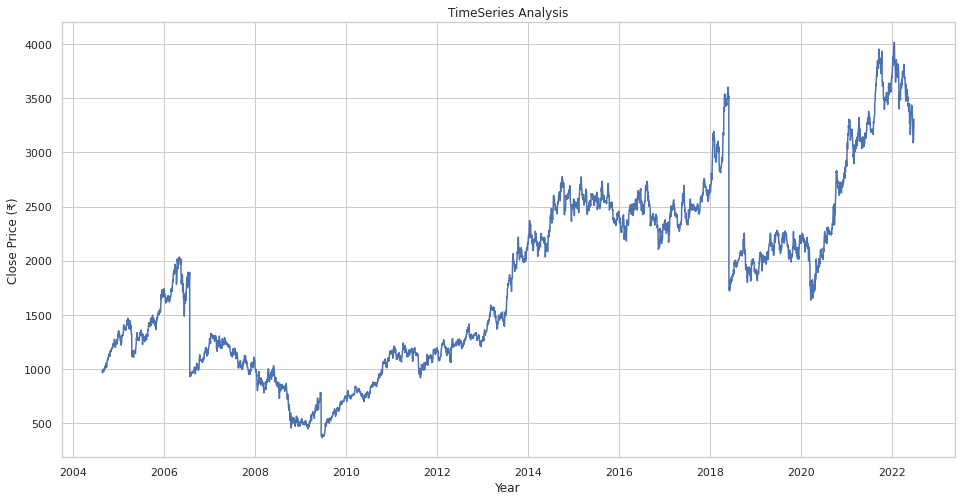

In [ ]:
stock['Date'] = pd.to_datetime(stock.Date, format="%Y-%m-%d")
stock.index=stock['Date']

import seaborn as sns
sns.set(style = 'whitegrid')
plt.figure(figsize=(16,8))
plt.plot(stock['Close'], label='ClosePriceHistory')
plt.title('TimeSeries Analysis')
plt.xlabel('Year')
plt.ylabel('Close Price (₹)')

In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4425 entries, 2004-08-25 to 2022-06-23
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       4425 non-null   datetime64[ns]
 1   Open                       4425 non-null   float64       
 2   High                       4425 non-null   float64       
 3   Low                        4425 non-null   float64       
 4   Close                      4425 non-null   float64       
 5   WAP                        4425 non-null   float64       
 6   No. of Shares              4425 non-null   float64       
 7   No. of Trades              4425 non-null   float64       
 8   Total Turnover             4425 non-null   float64       
 9   Deliverable Quantity       4423 non-null   float64       
 10  % Deli. Qty to Traded Qty  4423 non-null   float64       
 11  Spread H-L                 4425 non-null   float64 

In [ ]:
df_ts = stock[['Date','Close']]
df_ts = df_ts.rename(columns ={'Date':'ds','Close':'y'})
df_ts.tail(5)

,ds,y
Date,,
2022-06-17,2022-06-17,3089.25
2022-06-20,2022-06-20,3113.20
2022-06-21,2022-06-21,3212.00
2022-06-22,2022-06-22,3222.00
2022-06-23,2022-06-23,3309.00


###FB Prophet Algo

In [ ]:
m = Prophet(growth = 'linear', yearly_seasonality = True, weekly_seasonality = False, )
m.fit(df_ts)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail(10)

,ds
4780,2023-06-14
4781,2023-06-15
4782,2023-06-16
4783,2023-06-17
4784,2023-06-18
4785,2023-06-19
4786,2023-06-20
4787,2023-06-21
4788,2023-06-22
4789,2023-06-23


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
4780,2023-06-14,4183.004994,3819.141396,4597.760233
4781,2023-06-15,4182.557767,3805.982288,4582.029971
4782,2023-06-16,4182.588690,3829.413424,4586.954559
4783,2023-06-17,4183.093608,3809.681442,4606.756488
4784,2023-06-18,4184.062059,3780.532187,4575.567729
4785,2023-06-19,4185.477711,3806.145696,4594.513768
4786,2023-06-20,4187.318889,3813.641981,4592.947003
4787,2023-06-21,4189.559163,3787.630597,4624.029704
4788,2023-06-22,4192.167999,3821.150900,4595.693002
4789,2023-06-23,4195.111446,3855.887731,4606.564709


In [ ]:
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-08-25,1115.762782,853.488653,1337.080549,1115.762782,1115.762782,-29.028094,-29.028094,-29.028094,-29.028094,-29.028094,-29.028094,0.0,0.0,0.0,1086.734688
1,2004-08-26,1116.593052,852.291628,1323.743500,1116.593052,1116.593052,-27.579907,-27.579907,-27.579907,-27.579907,-27.579907,-27.579907,0.0,0.0,0.0,1089.013146
2,2004-08-27,1117.423323,846.207249,1337.188850,1117.423323,1117.423323,-26.147159,-26.147159,-26.147159,-26.147159,-26.147159,-26.147159,0.0,0.0,0.0,1091.276163
3,2004-08-30,1119.914134,841.324159,1331.260079,1119.914134,1119.914134,-22.043847,-22.043847,-22.043847,-22.043847,-22.043847,-22.043847,0.0,0.0,0.0,1097.870287
4,2004-08-31,1120.744404,854.733362,1349.956417,1120.744404,1120.744404,-20.767821,-20.767821,-20.767821,-20.767821,-20.767821,-20.767821,0.0,0.0,0.0,1099.976582


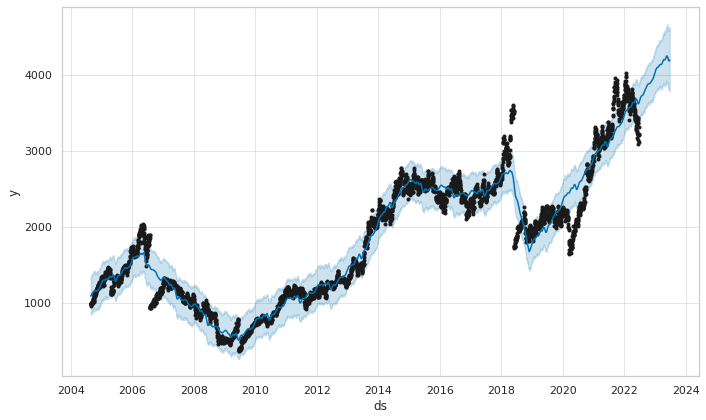

In [ ]:
fig1 = m.plot(forecast)

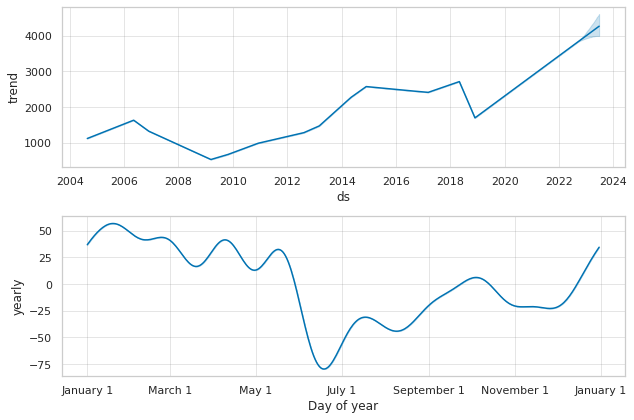

In [ ]:
fig2 = m.plot_components(forecast)


###Fitting with Built-in Holidays

In [ ]:
m.train_holiday_names

In [ ]:
from fbprophet.plot import plot_forecast_component as pfc
pfc(m,forecast, 'Christmas Day');

In [ ]:
m2 = Prophet(interval_width = 0.95, daily_seasonality=False)

#Adding holidays
m2.add_country_holidays(country_name='India')

m2.fit(df_ts)

/usr/local/lib/python3.7/dist-packages/prophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



In [ ]:
m2.train_holiday_names.to_list()

['Republic Day',
 'Independence Day',
 'Gandhi Jayanti',
 'Diwali',
 'Maundy Thursday',
 'Holi',
 'Mawlid',
 'Eid al-Fitr',
 'Feast of the Sacrifice',
 "New Year's Day",
 'Palm Sunday',
 'Good Friday',
 'Easter Sunday',
 'Feast of Pentecost',
 'Fest of St. Theresa of Calcutta',
 'Feast of the Blessed Virgin',
 'All Saints Day',
 'All Souls Day',
 'Christmas Day',
 'Boxing Day',
 'Feast of Holy Family',
 'Day of Ashura']

In [ ]:
#make_prediction
future2 = m2.make_future_dataframe(periods=90)
forecast2 = m2.predict(future2)

/usr/local/lib/python3.7/dist-packages/prophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/prophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



/usr/local/lib/python3.7/dist-packages/prophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/prophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



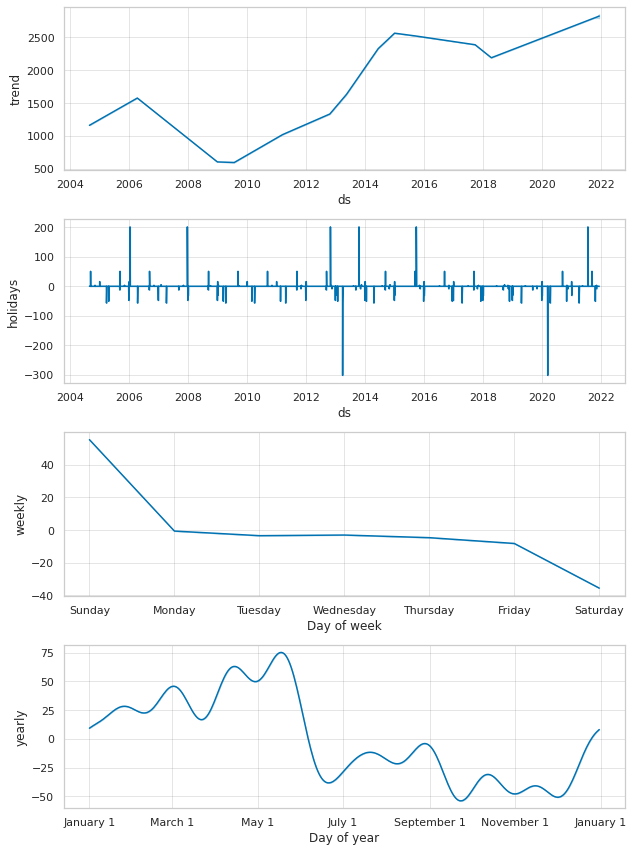

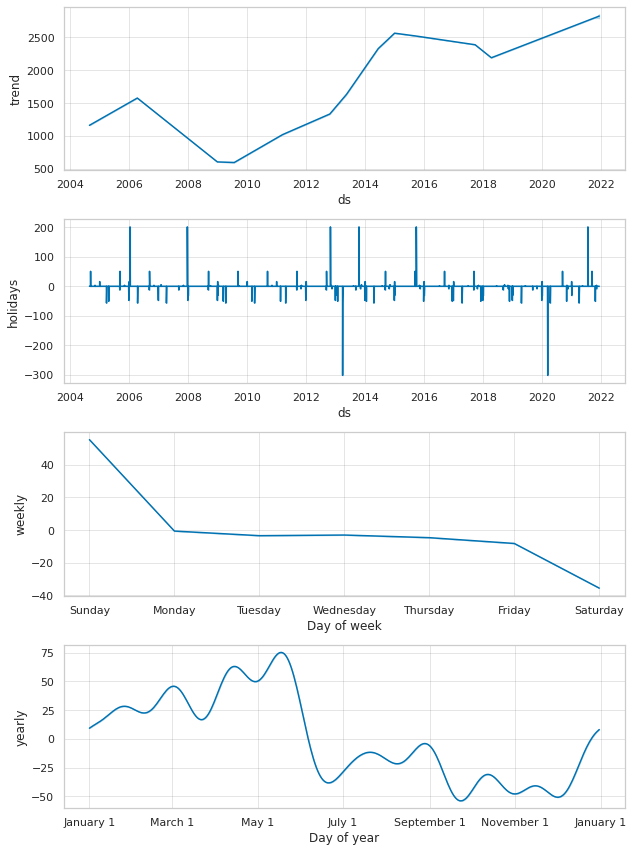

In [ ]:
#plotting model components
m2.plot_components(forecast2)

In [ ]:
#for an individual day
pfc(m2,forecast2,'Diwali')

###Using Plotly for more interactivenss

In [ ]:
plot_plotly(m2, forecast2)

/usr/local/lib/python3.7/dist-packages/prophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/prophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



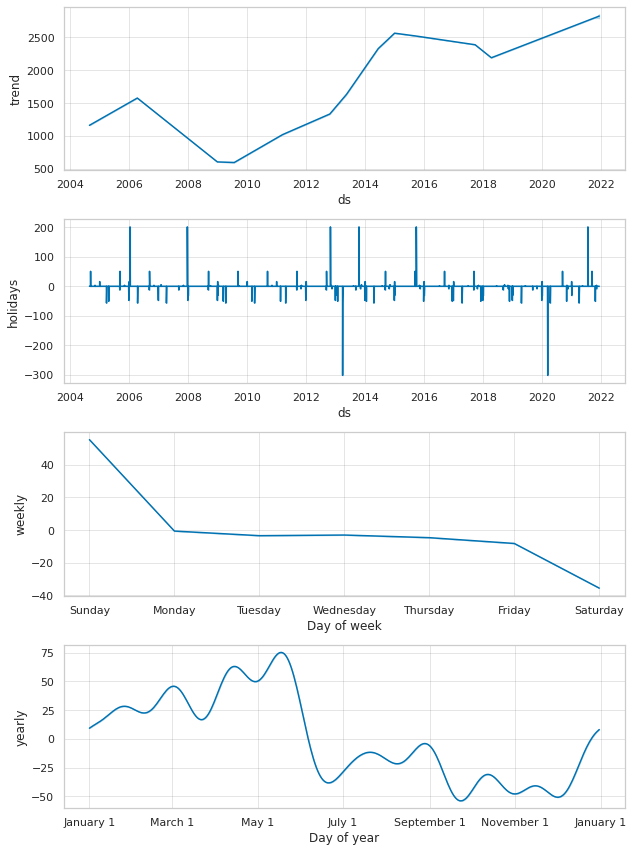

In [ ]:
ax = m2.plot_components(forecast2)

In [ ]:
plot_components_plotly(m2, forecast2) #for interactive graphs

/usr/local/lib/python3.7/dist-packages/prophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/prophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/prophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



###Adding a manual date

In [ ]:
addl_holidays = pd.DataFrame({'holiday':'my_holiday_sample',
                              'ds': pd.to_datetime(['2016/12/19', '2017/09/15',
                                                    '2018/12/19', '2019/09/15',
                                                    '2020/12/19', '2021/09/15'])})
addl_holidays

,holiday,ds
0,my_holiday_sample,2016-12-19
1,my_holiday_sample,2017-09-15
2,my_holiday_sample,2018-12-19
3,my_holiday_sample,2019-09-15
4,my_holiday_sample,2020-12-19
5,my_holiday_sample,2021-09-15


In [ ]:
#passing manual holidays
m3 = Prophet(interval_width=0.95, daily_seasonality=False, holidays=addl_holidays)
m3.add_country_holidays(country_name='India')
m3.fit(df_ts)

#making prediction
future3 = m3.make_future_dataframe(periods=90)
forecast3 = m3.predict(future3)

/usr/local/lib/python3.7/dist-packages/prophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/prophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/prophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



In [ ]:
m3.train_holiday_names.to_list()

['my_holiday_sample',
 'Republic Day',
 'Independence Day',
 'Gandhi Jayanti',
 'Diwali',
 'Maundy Thursday',
 'Holi',
 'Mawlid',
 'Eid al-Fitr',
 'Feast of the Sacrifice',
 "New Year's Day",
 'Palm Sunday',
 'Good Friday',
 'Easter Sunday',
 'Feast of Pentecost',
 'Fest of St. Theresa of Calcutta',
 'Feast of the Blessed Virgin',
 'All Saints Day',
 'All Souls Day',
 'Christmas Day',
 'Boxing Day',
 'Feast of Holy Family',
 'Day of Ashura']

##Anomaly Detection - Isolation Forest

In [ ]:
df_ts.head()

,ds,y
Date,,
2004-08-25,2004-08-25,987.50
2004-08-26,2004-08-26,978.55
2004-08-27,2004-08-27,962.35
2004-08-30,2004-08-30,986.25
2004-08-31,2004-08-31,987.95


In [ ]:
fig = px.line(df_ts.reset_index(), x='ds',y='y', title = 'Stock Closing Price Daily')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
df_ts['weekday'] = pd.Categorical(df_ts.ds.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df_ts['month']=df_ts.ds.dt.month
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4229 entries, 2004-08-25 to 2021-09-08
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       4229 non-null   datetime64[ns]
 1   y        4229 non-null   float64       
 2   weekday  4229 non-null   category      
 3   year     4229 non-null   int64         
 4   month    4229 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 169.7 KB


In [ ]:
df_ts.head()

,ds,y,weekday,year,month
Date,,,,,
2004-08-25,2004-08-25,987.50,Wednesday,2004,8
2004-08-26,2004-08-26,978.55,Thursday,2004,8
2004-08-27,2004-08-27,962.35,Friday,2004,8
2004-08-30,2004-08-30,986.25,Monday,2004,8
2004-08-31,2004-08-31,987.95,Tuesday,2004,8


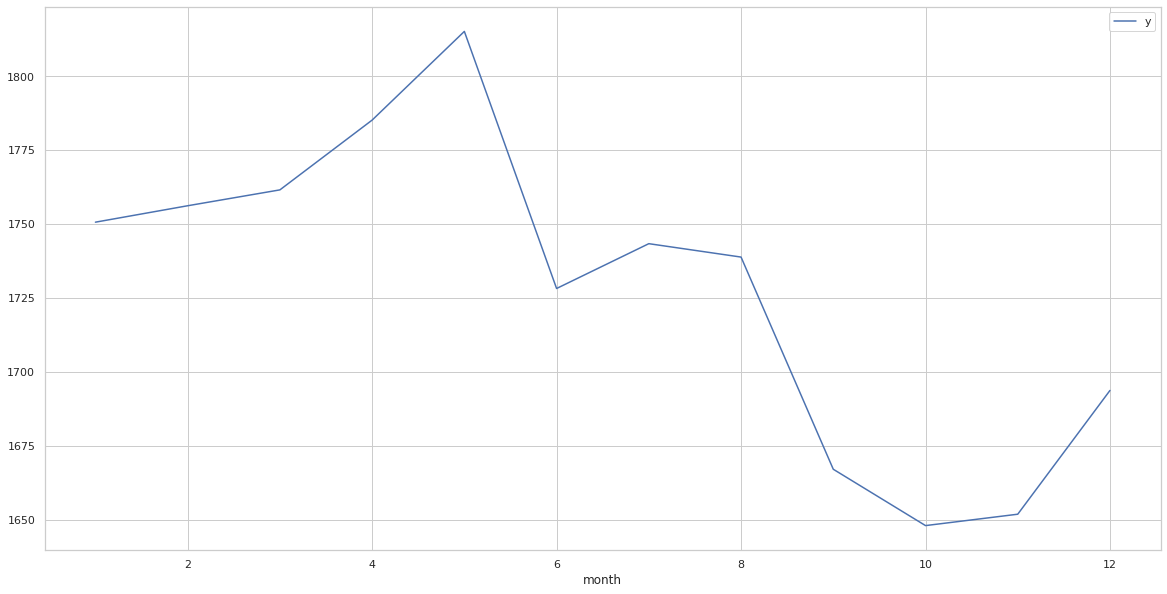

In [ ]:
df_ts[['y','month']].groupby('month').mean().plot()

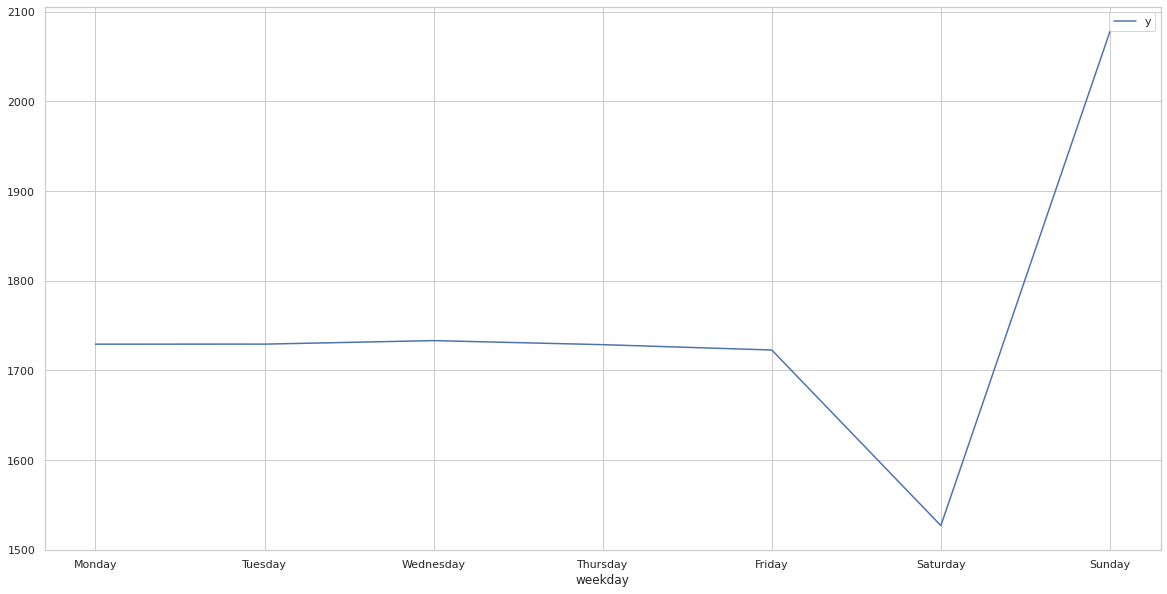

In [ ]:
df_ts[['y','weekday']].groupby('weekday').mean().plot()

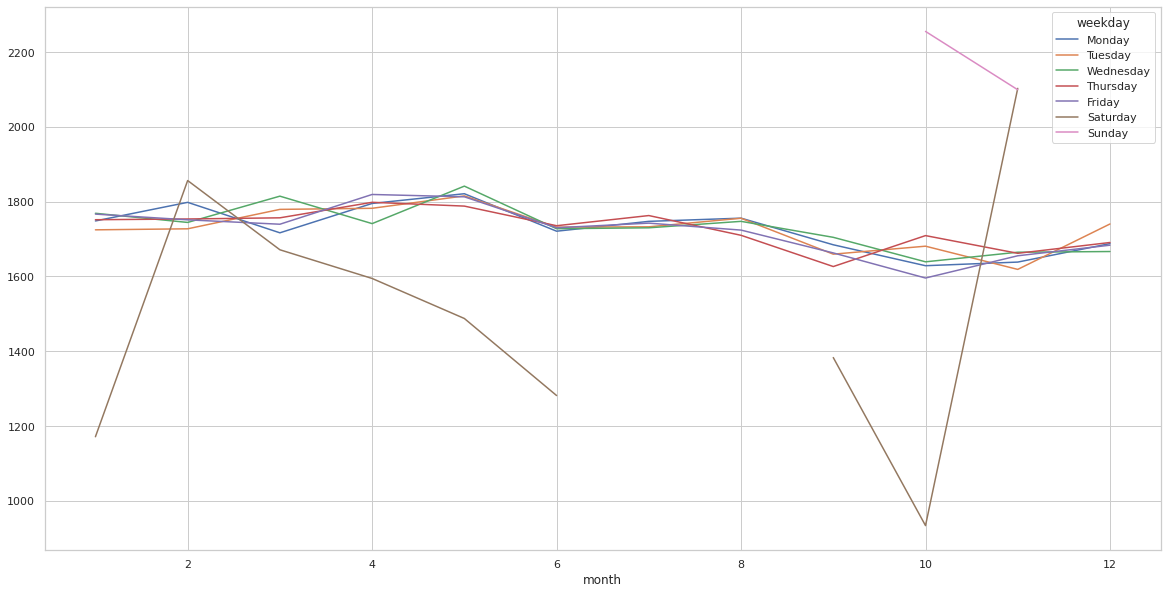

In [ ]:
df_ts.groupby(['month','weekday']).mean()['y'].unstack().plot()

In [ ]:
df_ts.join(df_ts.groupby(['month','weekday'])['y'].mean(), on=['month','weekday'],rsuffix='_avg')

,ds,y,weekday,year,month,y_avg
Date,,,,,,
2004-08-25,2004-08-25,987.50,Wednesday,2004,8,1747.493056
2004-08-26,2004-08-26,978.55,Thursday,2004,8,1710.165068
2004-08-27,2004-08-27,962.35,Friday,2004,8,1724.115493
2004-08-30,2004-08-30,986.25,Monday,2004,8,1756.031944
2004-08-31,2004-08-31,987.95,Tuesday,2004,8,1755.795270
...,...,...,...,...,...,...
2021-09-02,2021-09-02,3837.95,Thursday,2021,9,1626.592143
2021-09-03,2021-09-03,3841.35,Friday,2021,9,1663.025694
2021-09-06,2021-09-06,3851.05,Monday,2021,9,1684.818382


In [ ]:
df_fin=df_ts.join(df_ts.groupby(['month','weekday'])['y'].mean(), on=['month','weekday'],rsuffix='_avg')

In [ ]:
#encoding the weekday
df_fin['day'] = df_fin.ds.dt.weekday
df_fin.head()

,ds,y,weekday,year,month,y_avg,day
Date,,,,,,,
2004-08-25,2004-08-25,987.50,Wednesday,2004,8,1747.493056,2
2004-08-26,2004-08-26,978.55,Thursday,2004,8,1710.165068,3
2004-08-27,2004-08-27,962.35,Friday,2004,8,1724.115493,4
2004-08-30,2004-08-30,986.25,Monday,2004,8,1756.031944,0
2004-08-31,2004-08-31,987.95,Tuesday,2004,8,1755.795270,1


In [ ]:
data = df_fin[['y','month','day']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4229 entries, 2004-08-25 to 2021-09-08
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       4229 non-null   float64
 1   month   4229 non-null   int64  
 2   day     4229 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 132.2 KB


In [ ]:
from sklearn.ensemble import IsolationForest
#inut data has to all numerical for this model
model = IsolationForest(contamination = 0.0001, max_features=3, max_samples=0.9, n_estimators=200)
model.fit(data)

df_fin['outliers']=pd.Series(model.predict(data)).apply(lambda x:'yes' if (x== -1) else 'no')
df_fin.query('outliers=="yes"')
#try for another dataset

,ds,y,weekday,year,month,y_avg,day,outliers
Date,,,,,,,,


##Anomaly Detection-2

In [ ]:
train = df_ts[(df_ts['ds'] >= '2004-08-25') & (df_ts['ds'] <= '2018-08-25')]
test  = df_ts[(df_ts['ds'] >= '2018-08-25')]
print(train.shape, 'train size')
print(test.shape,'test size')

(3478, 5) train size
(751, 5) test size


In [ ]:
mi6 = Prophet(changepoint_range=0.95) #y_hat - which is confidence interval
mi6.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = mi6.make_future_dataframe(periods=751) #periods according to the test set - by default it gives daily frequency
future.tail()

,ds
4224,2020-09-09
4225,2020-09-10
4226,2020-09-11
4227,2020-09-12
4228,2020-09-13


In [ ]:
forecast = mi6.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4224,2020-09-09,1390.264599,518.061854,2098.887587,569.466947,2120.919886,-47.924844,-47.924844,-47.924844,-20.884430,-20.884430,-20.884430,-27.040414,-27.040414,-27.040414,0.0,0.0,0.0,1342.339755
4225,2020-09-10,1388.895696,502.418178,2088.544862,565.738032,2120.403181,-48.780760,-48.780760,-48.780760,-21.460262,-21.460262,-21.460262,-27.320498,-27.320498,-27.320498,0.0,0.0,0.0,1340.114937
4226,2020-09-11,1387.526794,508.342824,2079.174087,562.078342,2120.021617,-52.708171,-52.708171,-52.708171,-24.927914,-24.927914,-24.927914,-27.780258,-27.780258,-27.780258,0.0,0.0,0.0,1334.818623
4227,2020-09-12,1386.157891,497.255859,2119.904300,558.608256,2121.705894,-63.913869,-63.913869,-63.913869,-35.522896,-35.522896,-35.522896,-28.390973,-28.390973,-28.390973,0.0,0.0,0.0,1322.244022
4228,2020-09-13,1384.788989,669.322690,2294.528914,555.192352,2122.572969,116.909235,116.909235,116.909235,146.029998,146.029998,146.029998,-29.120762,-29.120762,-29.120762,0.0,0.0,0.0,1501.698224


In [ ]:
results = pd.concat([df_ts.set_index('ds')['y'], forecast.set_index('ds')], axis=1)

In [ ]:
results.tail()

,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,error,uncertainity
ds,,,,,,,,,,,,,,,,,,,,,
2021-09-02,3837.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-03,3841.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-06,3851.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-07,3814.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-08,3774.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


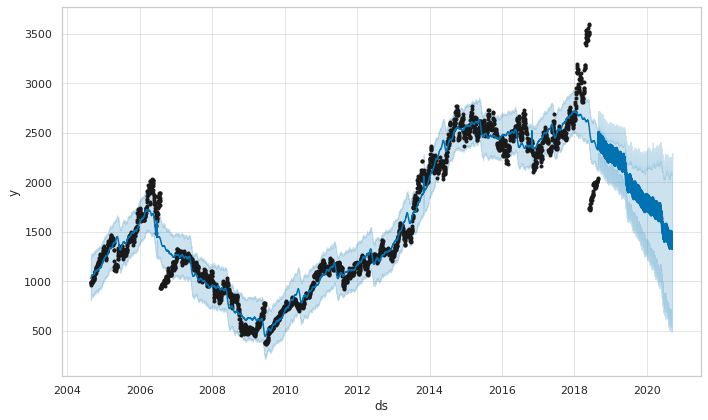

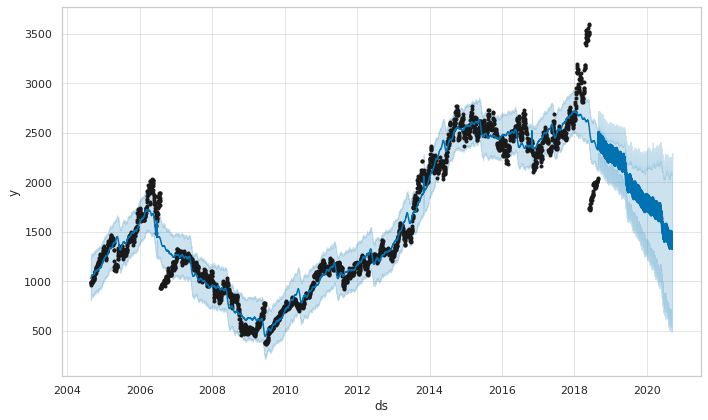

In [ ]:
mi6.plot(forecast)

In [ ]:
results['error'] = results['y']-results['yhat']
results['uncertainity'] = results['yhat_upper']-results['yhat_lower']
results = results[['y','yhat','yhat_lower','yhat_upper','error','uncertainity']]
results.head()

,y,yhat,yhat_lower,yhat_upper,error,uncertainity
ds,,,,,,
2004-08-25,987.50,1027.034420,815.464303,1245.196670,-39.534420,429.732366
2004-08-26,978.55,1029.810771,812.755878,1247.839580,-51.260771,435.083701
2004-08-27,962.35,1029.709688,804.920238,1236.251263,-67.359688,431.331025
2004-08-30,986.25,1044.094376,822.474759,1249.211484,-57.844376,426.736725
2004-08-31,987.95,1044.504502,833.284900,1256.707229,-56.554502,423.422329


In [ ]:
results[results['error'].abs() > 1*results['uncertainity']]

96

In [ ]:
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1*x['uncertainity']) else 'No', axis = 1)

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainity,anomaly
ds,,,,,,,
2004-08-25,987.50,1027.034420,815.464303,1245.196670,-39.534420,429.732366,No
2004-08-26,978.55,1029.810771,812.755878,1247.839580,-51.260771,435.083701,No
2004-08-27,962.35,1029.709688,804.920238,1236.251263,-67.359688,431.331025,No
2004-08-30,986.25,1044.094376,822.474759,1249.211484,-57.844376,426.736725,No
2004-08-31,987.95,1044.504502,833.284900,1256.707229,-56.554502,423.422329,No
...,...,...,...,...,...,...,...
2021-09-02,3837.95,NaN,NaN,NaN,NaN,NaN,No
2021-09-03,3841.35,NaN,NaN,NaN,NaN,NaN,No
2021-09-06,3851.05,NaN,NaN,NaN,NaN,NaN,No


In [ ]:
fig = px.scatter(results.reset_index(), x = 'ds', y='y', color='anomaly', title='Stock Market Anomaly')

fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()


###Cross validation
Train
Test
Validation

In [ ]:
from fbprophet.diagnostics import cross_validation as cv
df_cv = cv(m,initial = '3650 days', period = '90 days', horizon = '365 days')
df_cv.head()


INFO:fbprophet:Making 25 forecasts with cutoffs between 2014-09-19 00:00:00 and 2020-08-18 00:00:00


  0%|          | 0/25 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-09-22,2485.354196,2343.025757,2624.655942,2720.60,2014-09-19
1,2014-09-23,2485.458467,2352.293916,2634.158247,2688.90,2014-09-19
2,2014-09-24,2486.017612,2346.617007,2622.255451,2643.45,2014-09-19
3,2014-09-25,2489.888584,2345.033891,2629.948141,2707.65,2014-09-19
4,2014-09-26,2487.352499,2354.479765,2629.974303,2682.85,2014-09-19


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,107163.258236,327.357997,258.490013,0.116725,0.087185,0.354181
1,38 days,106407.272988,326.201277,257.710323,0.116153,0.086522,0.356945
2,39 days,107499.712322,327.871488,258.366034,0.116483,0.086468,0.357994
3,40 days,108814.738806,329.870791,259.570327,0.117144,0.086522,0.357172
4,41 days,109466.083757,330.856591,261.326973,0.117881,0.087427,0.355956


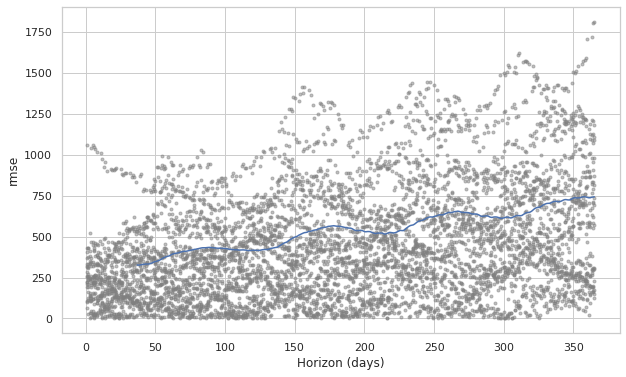

In [ ]:
from fbprophet.plot import plot_cross_validation_metric as plt_cv_m
fig3 = plt_cv_m(df_cv, metric = 'rmse')

In [ ]:
#uncertainty in the trend and observation noise
#Bayesian sampling
m = Prophet(mcmc_samples=2, yearly_seasonality = True )
forecast = m.fit(df_ts).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
/usr/local/lib/python3.7/dist-packages/pystan/diagnostics.py:217: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
fig = m.plot_components(forecast)

###Sort the dataset on date time and filter “Date” and “Close” columns:

In [ ]:
df = stock
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

###Normalize the new filtered dataset

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

tr_len = round(0.75*(len(final_dataset)))

train_data=final_dataset[0:tr_len,:]
valid_data=final_dataset[tr_len:,:]

#new_dataset = new_dataset.reset_index()
#new_dataset.index=new_dataset.Date
#new_dataset.drop("Date",axis=1,inplace=True)
new_dataset.drop("Date",axis=1,inplace=True)
#final_dataset

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

###Build and train the LSTM model

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

5458/5458 - 129s - loss: 6.7559e-04


###Take a sample of a dataset to make stock price predictions using the LSTM model

In [ ]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

NameError: ignored

In [ ]:
print(inputs_data.shape)
print(new_dataset.shape)
print(predicted_closing_price.shape)
predicted_closing_price[-10:-1,]

(1900, 1)
(7358, 1)
(1840, 1)


array([[1870.33  ],
       [1865.4811],
       [1870.5122],
       [1885.2106],
       [1907.6334],
       [1926.8698],
       [1933.7242],
       [1941.3633],
       [1939.3323]], dtype=float32)

In [ ]:
lstm_model.predict(0.6,0.5,1)

###Save the LSTM model:

In [ ]:
lstm_model.save("saved_model.h5")

Visualize the predicted stock costs with actual stock costs:

In [ ]:
train_data=new_dataset[:tr_len]
valid_data=new_dataset[tr_len:]
valid_data['Predictions']=predicted_closing_price
plt.legend
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])


NameError: ignored

sm.tsa.SARIMAX

sm.tsa.UnobservedComponents

sm.tsa.VARMAX

sm.tsa.DynamicFactor

In [ ]:
endog = stock['Close']
mod = sm.tsa.SARIMAX(endog, order=(1,0,0), trend='c')
# Estimate the parameters
res = mod.fit()

print(res.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                 6255
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -24477.806
Date:                Sun, 30 May 2021   AIC                          48961.612
Time:                        10:06:43   BIC                          48981.836
Sample:                             0   HQIC                         48968.620
                               - 6255                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2690      0.327      0.822      0.411      -0.372       0.910
ar.L1          0.9992      0.001   1809.429      0.000       0.998       1.000
sigma2       146.5913      0.163    897.512      0.0

In [ ]:
print(res.forecast())
print(res.forecast(steps=7))

6255    742.656326
dtype: float64
6255    742.656326
6256    742.362874
6257    742.069645
6258    741.776638
6259    741.483852
6260    741.191289
6261    740.898947
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

macrodata = sm.datasets.macrodata.load_pandas().data
macrodata.index = pd.period_range('1959Q1', '2009Q3', freq='Q')
macrodata

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


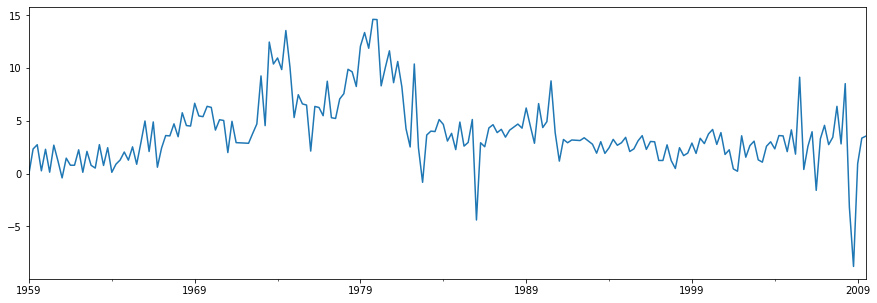

In [ ]:

endog.plot(figsize=(15, 5))

In [ ]:
# Construct the model
mod = sm.tsa.SARIMAX(endog, order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

print(res.summary())

###Build the dashboard using Plotly dash

In [ ]:
!pip3 install dash
!pip3 install dash-html-components
!pip3 install dash-core-components

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import sys
from flask import Flask



app = dash.Dash()
server = app.server

scaler=MinMaxScaler(feature_range=(0,1))

df_nse = quandl.get("BSE/BOM532523")
df_nse = df_nse.reset_index()

df_nse["Date"]=pd.to_datetime(df_nse.Date,format="%Y-%m-%d")
df_nse.index=df_nse['Date']


data=df_nse.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(df_nse)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_data["Date"][i]=data['Date'][i]
    new_data["Close"][i]=data["Close"][i]

new_data.index=new_data.Date
new_data.drop("Date",axis=1,inplace=True)

dataset=new_data.values

tr_len = round(0.75*(len(final_dataset)))

train=dataset[0:tr_len,:]
valid=dataset[tr_len:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

x_train,y_train=[],[]

for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

model=load_model("saved_model.h5")

inputs=new_data[len(new_data)-len(valid)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test=[]
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

train=new_data[:tr_len]
valid=new_data[tr_len:]
valid['Predictions']=closing_price



if __name__=='__main__':
   #app.run_server(debug=True)
   app.debug=True
   app.run_server(port=5000, debug=True)
   #app.exec_()
   #sys.exit(1)


Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [ ]:
data = quandl.get_table('BSE', compnumber=["BOM540755","BOM500188"], paginate=True)

In [ ]:
data = quandl.get(["BSE/BOM540755","BSE/BOM500188"], paginate=True)
data

In [ ]:
quandl.bulkdownload("ZEA")